<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/heart_disease_prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Disease Prediction using Machine Learning**

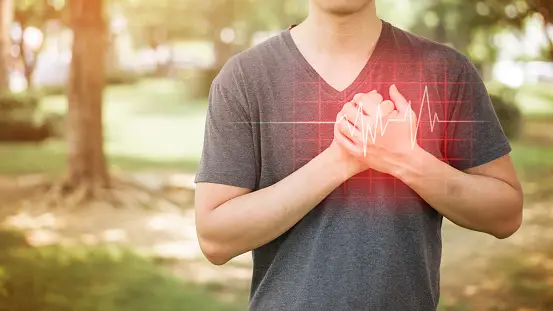

##**Introduction**

Heart disease is a "catch-all" phrase for a variety of
conditions that affect the heart’s structure and function. However is is mostly used to refer to cardiovascular disease, which stands as a formidable global health challenge, affecting millions of lives and imposing a substantial burden on healthcare systems. With its multifaceted nature and diverse manifestations, heart disease has emerged as one of the leading cause of morbidity and mortality worldwide. Risk factors for heart disease are mainly linked to hypertension, diabetes and lifestyle choices: smoking, alcoholism, physical inactivity, inadequate diet, obesity, and physical and psychological stress. A thorough clinical history and physical exam directed but not limited to the cardiovascular system are the hallmarks for the diagnosis of heart disease. Some of the diagnositic methods include: Echocardiography, Cardiac catheterization, Cardiac biopsy, Cardiac computerized tomography (CT) scan, Cardiac magnetic resonance imaging (MRI), Blood tests, X-ray scans, Electrocardiogram (ECG), Holter monitoring.




**Project Objective**: Predicting absence or presence of heart disease in patients based on features given

In the realm of healthcare and medical research, the potential for data-driven insights has become increasingly evident, offering opportunities to enhance diagnostic accuracy and patient care. This data science project aims to dive into the realm of cardiovascular health by harnessing the power of machine learning. The focal point of this investigation is a comprehensive dataset that houses a plethora of attributes pertaining to heart health, enabling the exploration of predictive models for identifying the presence or absence of heart disease in patients.


Within this extensive dataset, focus on a curated subset of 14 attributes. The crux of the matter lies in the target field, which denotes the presence of heart disease in patients.

Furthermore, privacy considerations have not been overlooked in this endeavor. The dataset has undergone anonymization. This meticulous attention to privacy ensures that the project adheres to ethical and legal standards while enabling analysis.
 Origin: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?select=Heart_Disease_Prediction.csv

In this project we will preform data preprocessing, feature selection, exploratory data analysis, model development, evaluation, and interpretation. By leveraging the power of machine learning techniques, we endeavor to construct predictive models that can aid healthcare professionals in making informed decisions and ultimately contribute to the betterment of patient outcomes in the realm of cardiovascular health.

###**Keys and definition of the features chosen:**

•	Age- age in years

•	Sex -  gender
    1 = male
    0 = female

•	Chest pain type :  

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

•	BP -  systolic blood pressure in mm Hg


•	Cholesterol - serum cholesterol in mg/dl


•	FBS over 120 - fasting blood sugar > 120 mg/dl:

    --1 = true
    --0 = false


•	EKG results - number of EKG readings

•	Max HR - maximum heart rate achieved

•	Exercise angina -  exercise induced angina

    1 = yes
    0 = no

•	ST depression- ST depression induced by exercise relative to rest

•	Slope of ST -  the slope of the peak exercise ST segment
    
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
•	Number of vessels fluro: the number of vessels detected by colored fluoroscopy.  fluoroscopy detected coronary artery calcification

•	Thallium - A thallium stress test is an imaging test that indicates how well blood flows into your heart while you’re exercising or at rest.

    --Value 3: normal
    --Value 6: fixed defect
    --Value 7: reversable defect

•	Heart Disease: diagnosis of heart disease if it was absent or present


##**Limitations of the Dataset**

1. only systolic Blood pressure is given
2. Only say the number of EKG results, not the actual results
3. Dataset doesnot diferenciate between the types of heart diseases
4. Dataset doesnot take in account if the pacient has other comorbidities
              
              

##**The Problem Statement**
Determine if heart disease is present or absent in a patient

# **Exploratory Data Analysis(EDA)**


In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,  f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#read csv
df= pd.read_csv("Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.shape


(270, 14)

In [4]:
df.columns # see the features of the dataset

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
print(df['Heart Disease'].unique().tolist())

['Presence', 'Absence']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

The values are integers and floats except the target values which is an object

In [7]:
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


<Axes: >

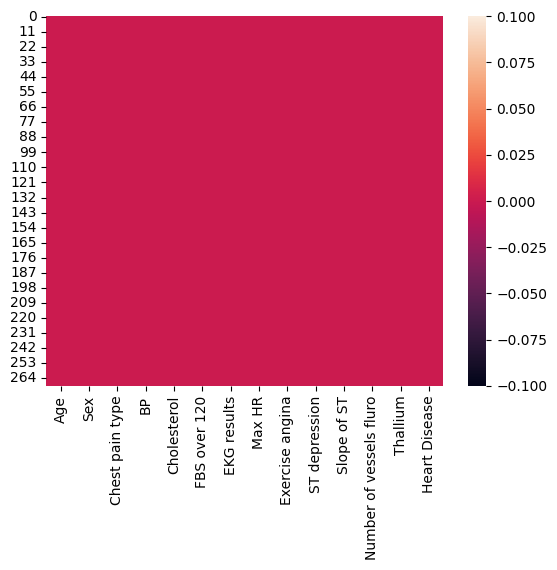

In [8]:
sns.heatmap(df.isnull()) #show where ther are no missing values

In [9]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Based on the info table, isnull, isna functions, there are no missing values or no NaN values

In [10]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [11]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<Axes: >

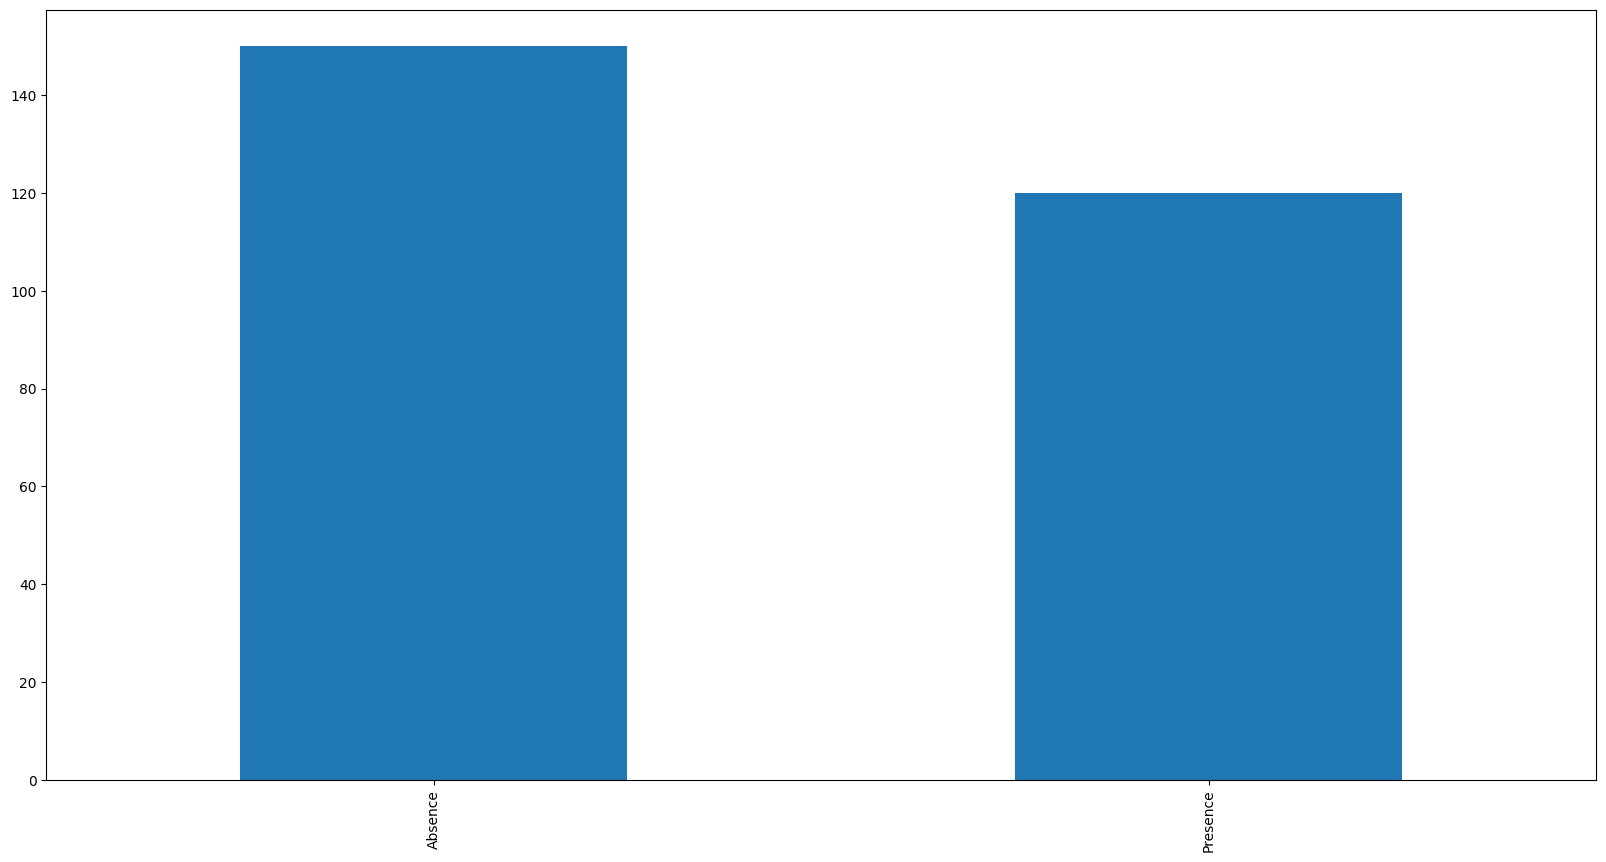

In [12]:
df['Heart Disease'].value_counts().plot(kind='bar', figsize=(20,10))

The Target values are relatively balanced

**The distribuition of gender in the dataset:**

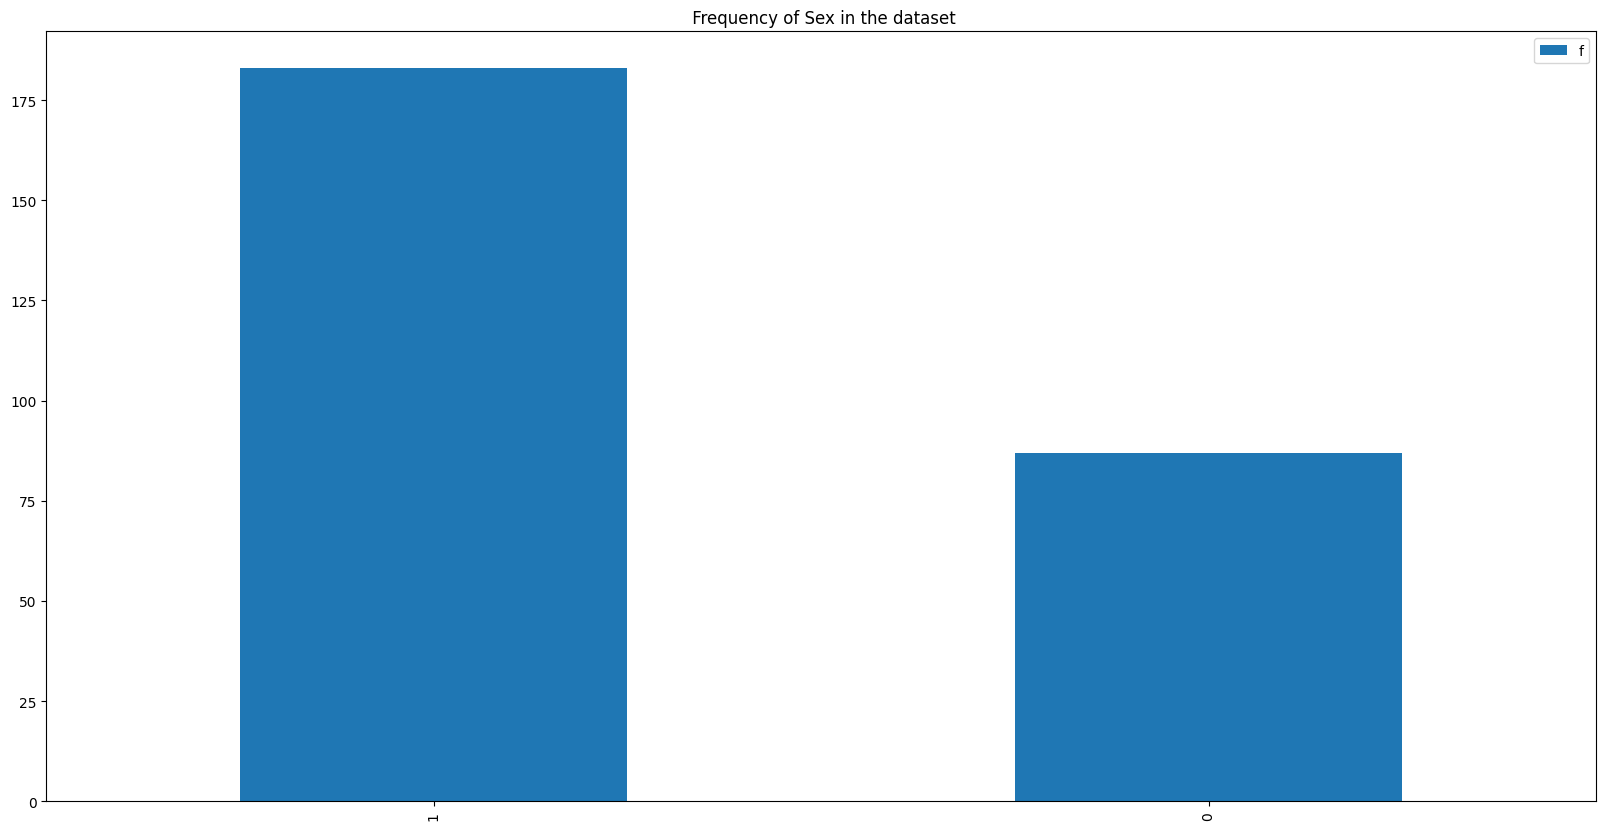

In [13]:
df.Sex.value_counts().plot(kind='bar', figsize=(20,10)) #female =0 and Male = 1
plt.title(" Frequency of Sex in the dataset")
plt.legend("female =0 and Male = 1")

There are more males in the dataset than females

**How does sex relate to the frequency of heart disease?**

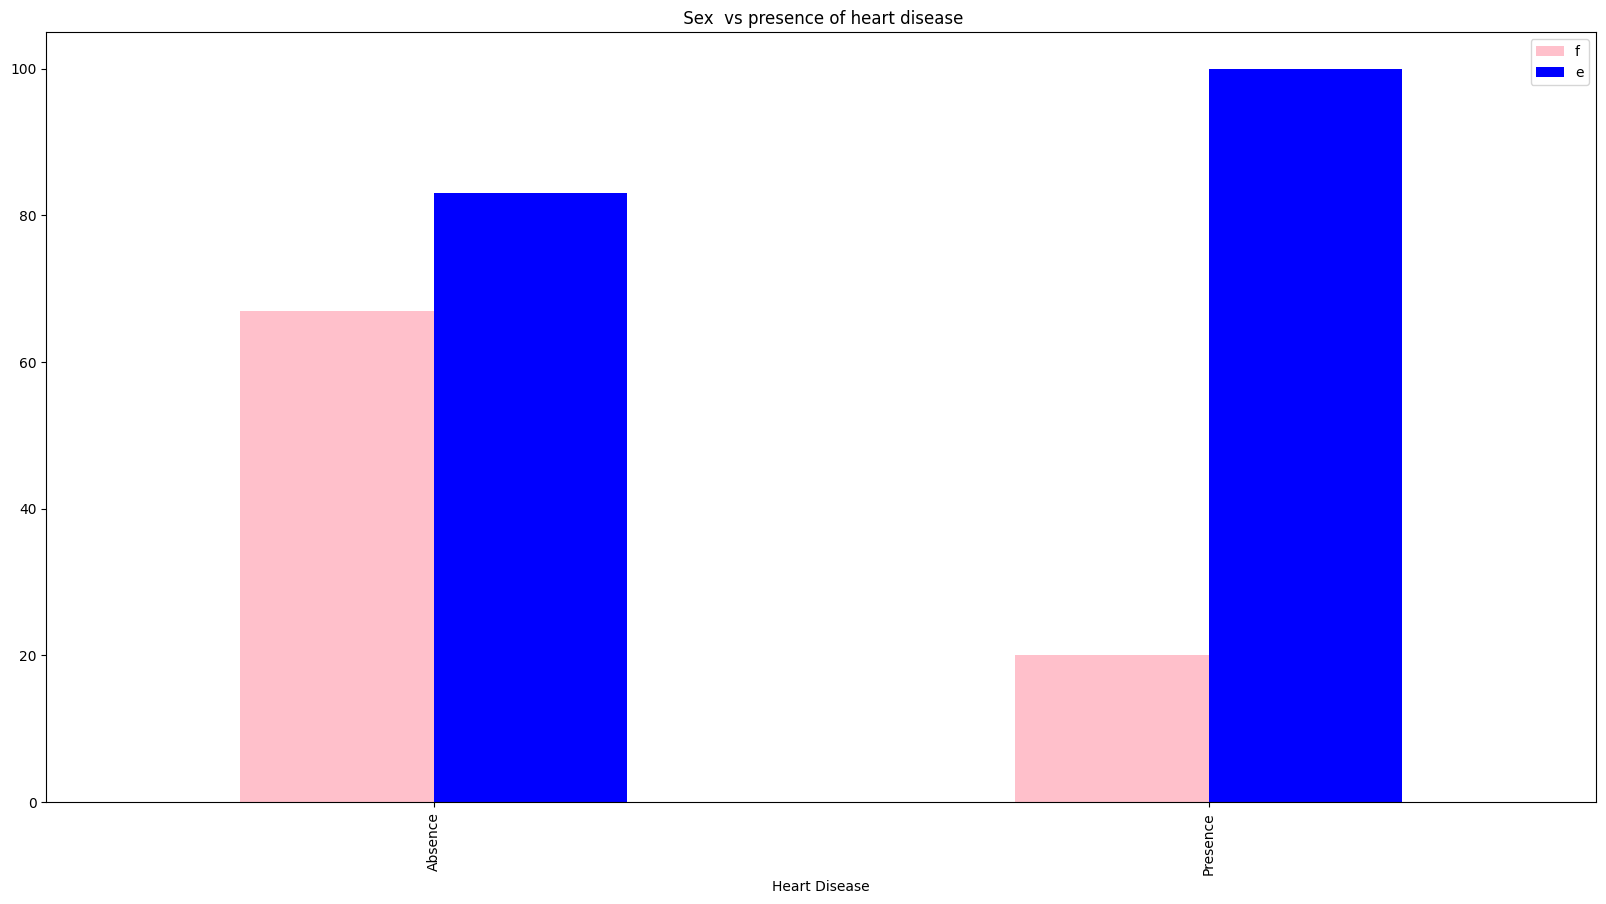

In [14]:

pd.crosstab(df['Heart Disease'], df.Sex).plot(kind = 'bar', figsize=(20,10), color=['pink', 'blue'])
pd.crosstab(df['Heart Disease'], df.Sex)
plt.title(" Sex  vs presence of heart disease")
plt.legend("female =0 and Male = 1")

Compare Age Vs Max HR and presence of Heart Disease

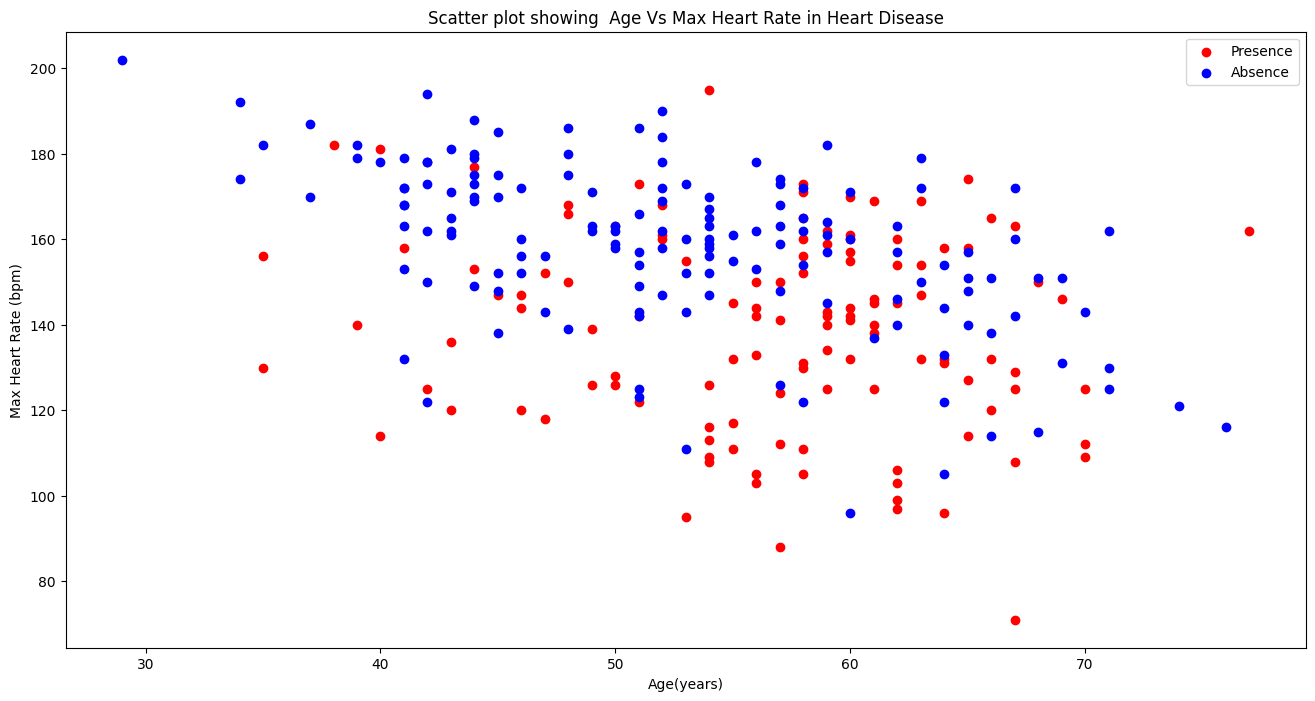

In [15]:

plt.figure(figsize=(16, 8))
plt.scatter(df.Age[df["Heart Disease"]=='Presence'],
            df["Max HR"][df["Heart Disease"]=='Presence'], c= 'red' ) #show a scatter plot age vs heart rate, where heart disease is present
plt.title("Scatter plot showing  Age Vs Max Heart Rate in Heart Disease")


plt.scatter(df.Age[df["Heart Disease"]=='Absence'],
            df["Max HR"][df["Heart Disease"]=='Absence'], c= 'blue' ) #show a scatter plot age vs heart rate, where heart disease is present
plt.xlabel("Age(years)")
plt.ylabel("Max Heart Rate (bpm)")
plt.legend(["Presence", "Absence" ])

<ipython-input-16-263b10278a62>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax)


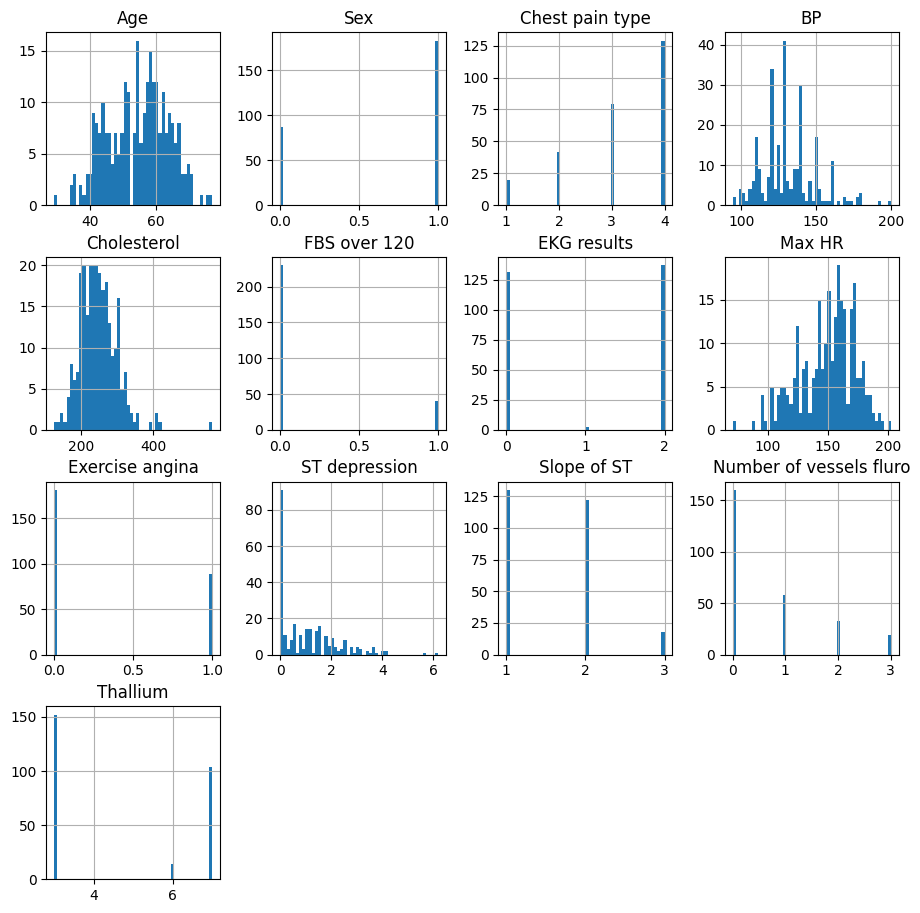

In [16]:
fig, ax = plt.subplots(figsize = (11,11))
df.hist(bins=50, ax=ax)
plt.show()



based on the histograms you can see that some values are categorical

Chest pain type,1,2,3,4
Heart Disease,,,,
Absence,15,35,62,38
Presence,5,7,17,91


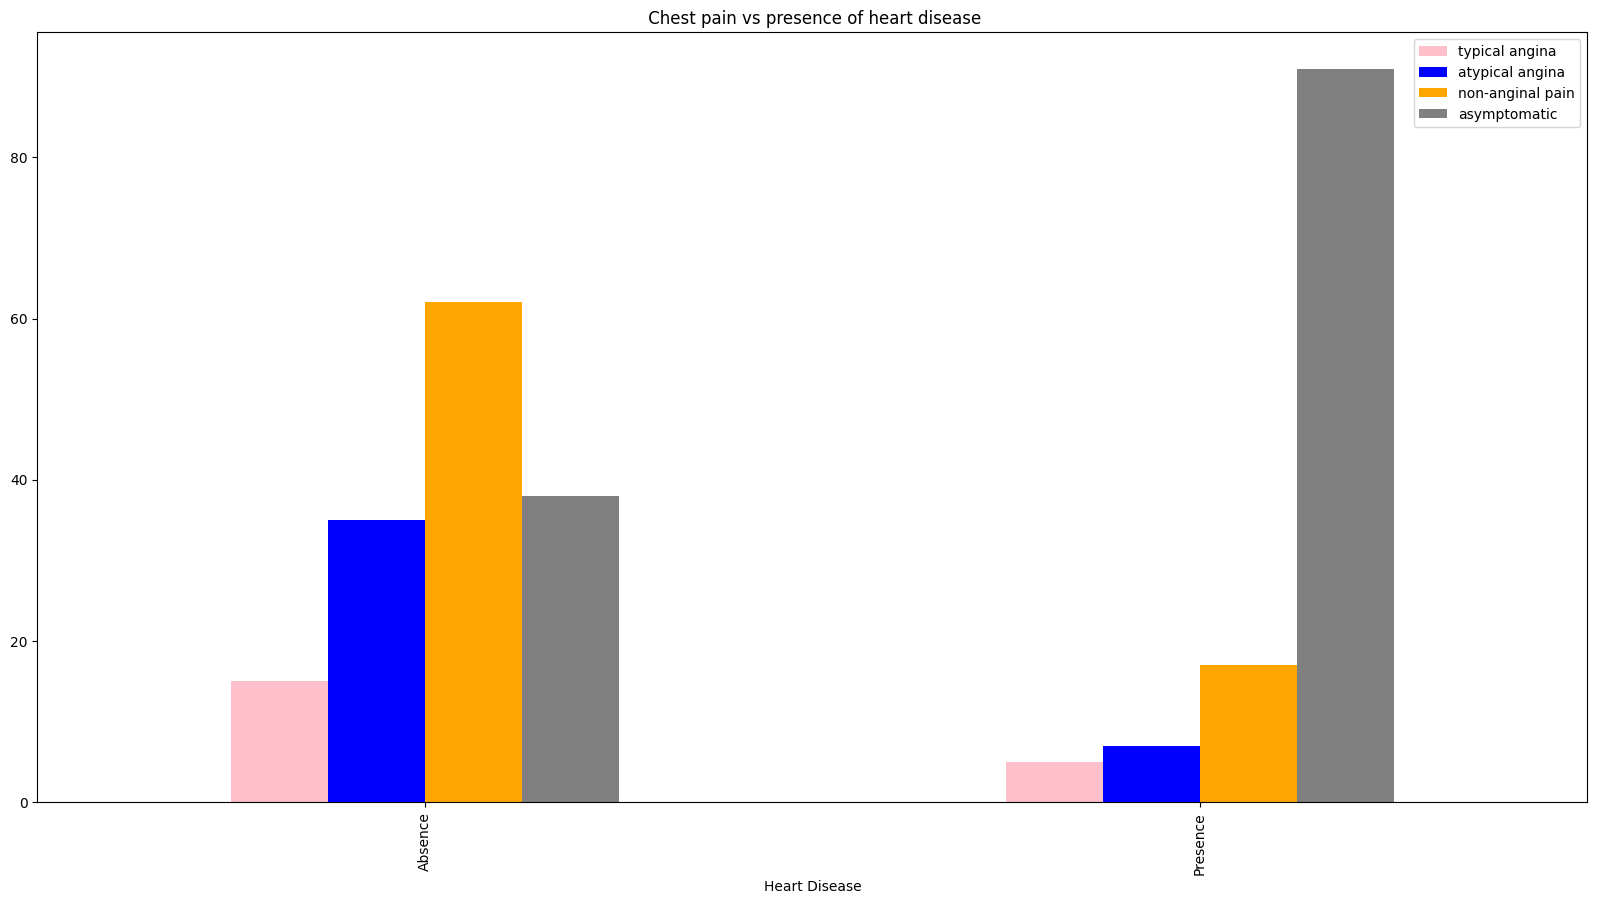

In [17]:
#Heart frequency in Chest pain

pd.crosstab(df['Heart Disease'], df['Chest pain type']).plot(kind = 'bar', figsize=(20,10), color=['pink', 'blue', 'orange', 'gray'])
pd.crosstab(df['Heart Disease'], df['Chest pain type'])
plt.title(" Chest pain vs presence of heart disease")
plt.legend( ['typical angina', 'atypical angina', 'non-anginal pain',  'asymptomatic'])
pd.crosstab(df['Heart Disease'], df['Chest pain type'])

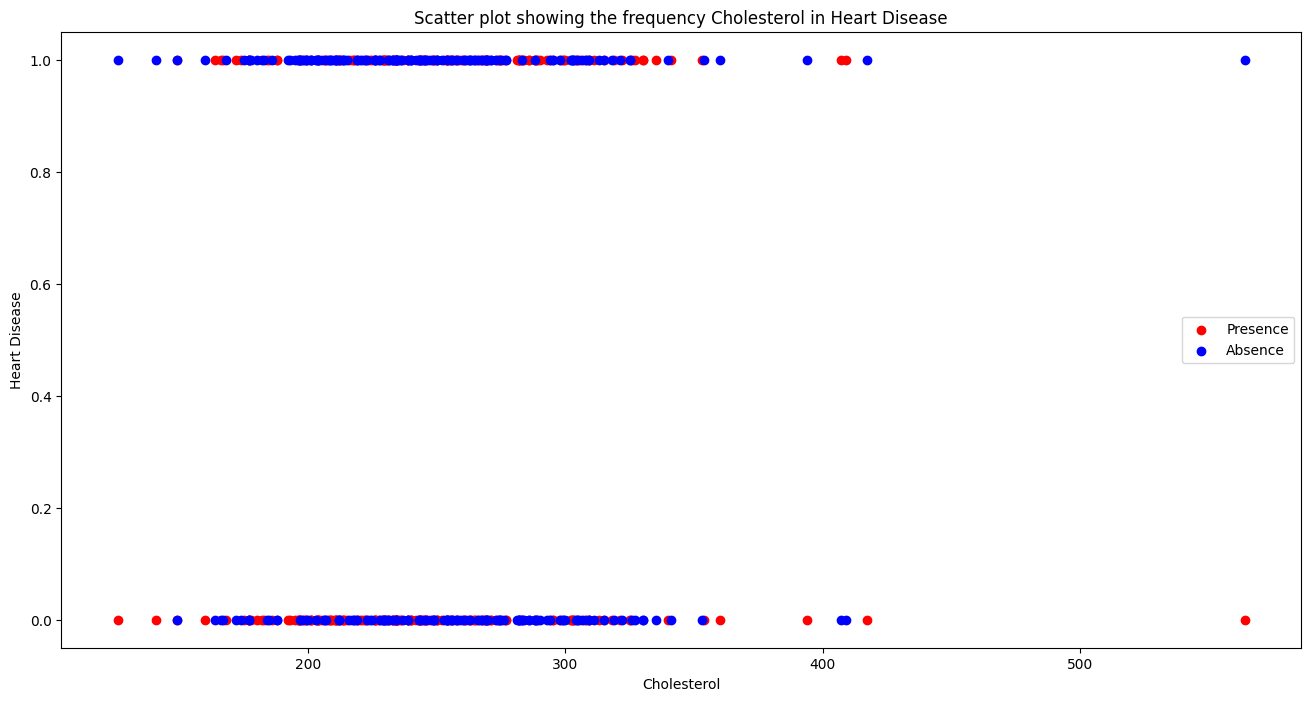

In [18]:
plt.figure(figsize=(16, 8))
plt.scatter(df["Cholesterol"],[df["Heart Disease"]=='Presence'], c= 'red' )
plt.title("Scatter plot showing the frequency Cholesterol in Heart Disease")


plt.scatter(df["Cholesterol"],[df["Heart Disease"]=='Absence'], c= 'blue' )
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease")
plt.legend(["Presence", "Absence" ])

##**Delete column**
the feature 'Heart Disease_Absence' will be deleted to prevent multiple collinearity

In [19]:
 #One-hot encode
cols = ['Heart Disease']

for col in cols:
    df= pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df.drop([col], axis=1, inplace=True)
    df.drop(["Heart Disease_Absence"], axis=1, inplace=True)

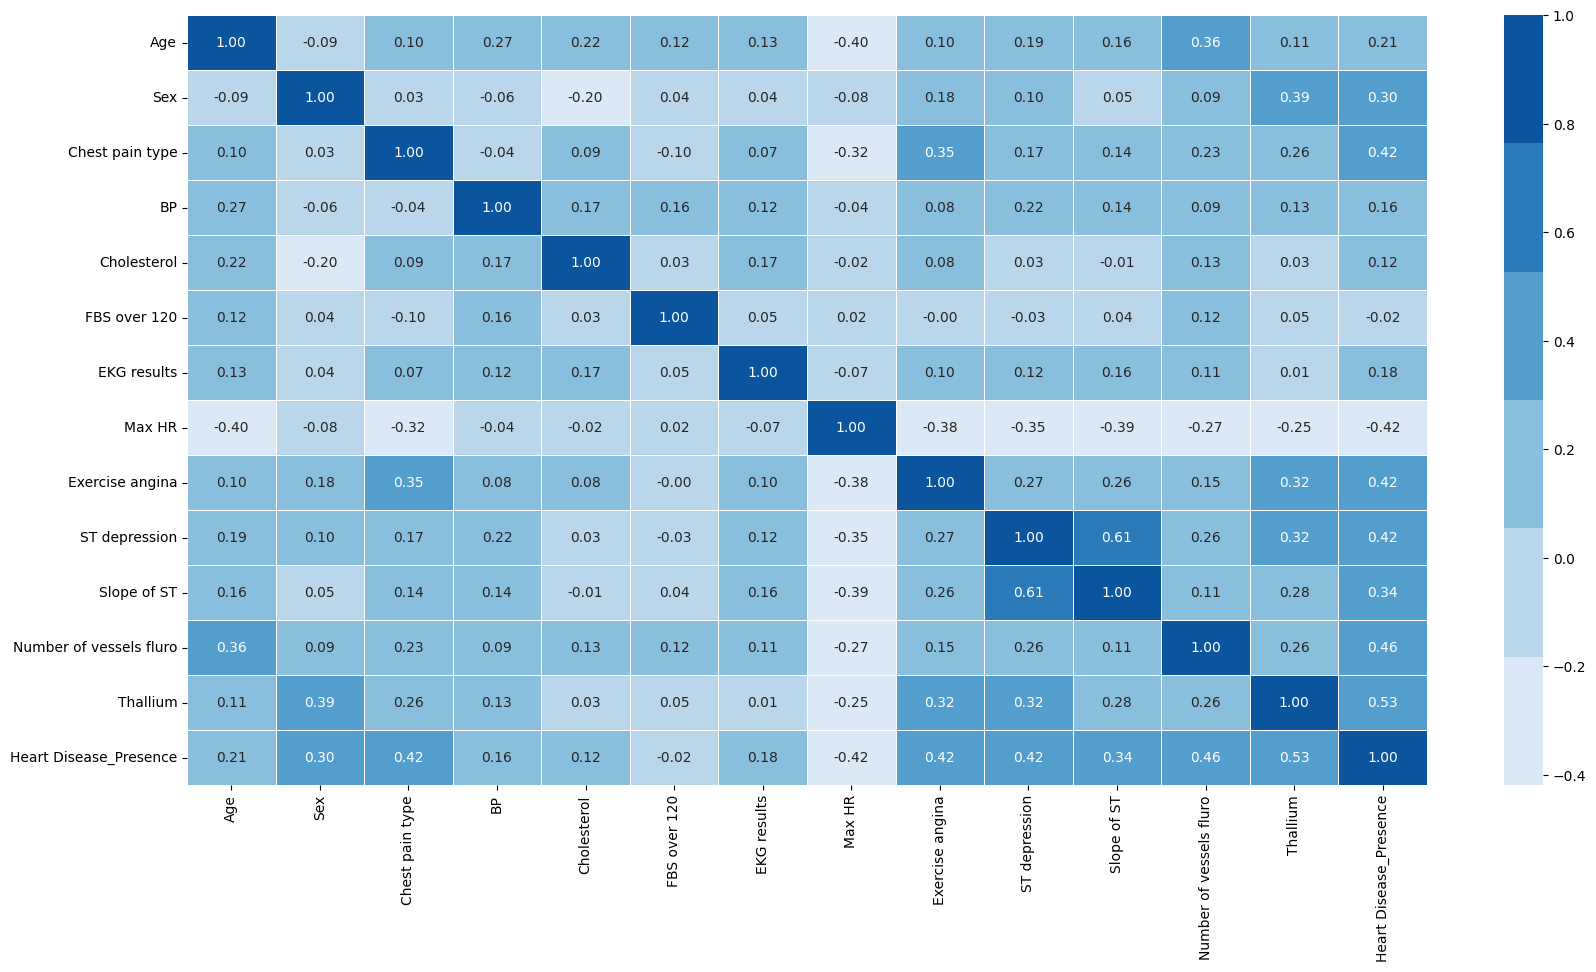

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 10))
colormap = sns.color_palette("Blues")
ax = sns.heatmap(corr_matrix, annot =  True, linewidths= 0.5, fmt='.2f', cmap = colormap)

In [21]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


**Analyze each individual syptom and how it relates to the target**

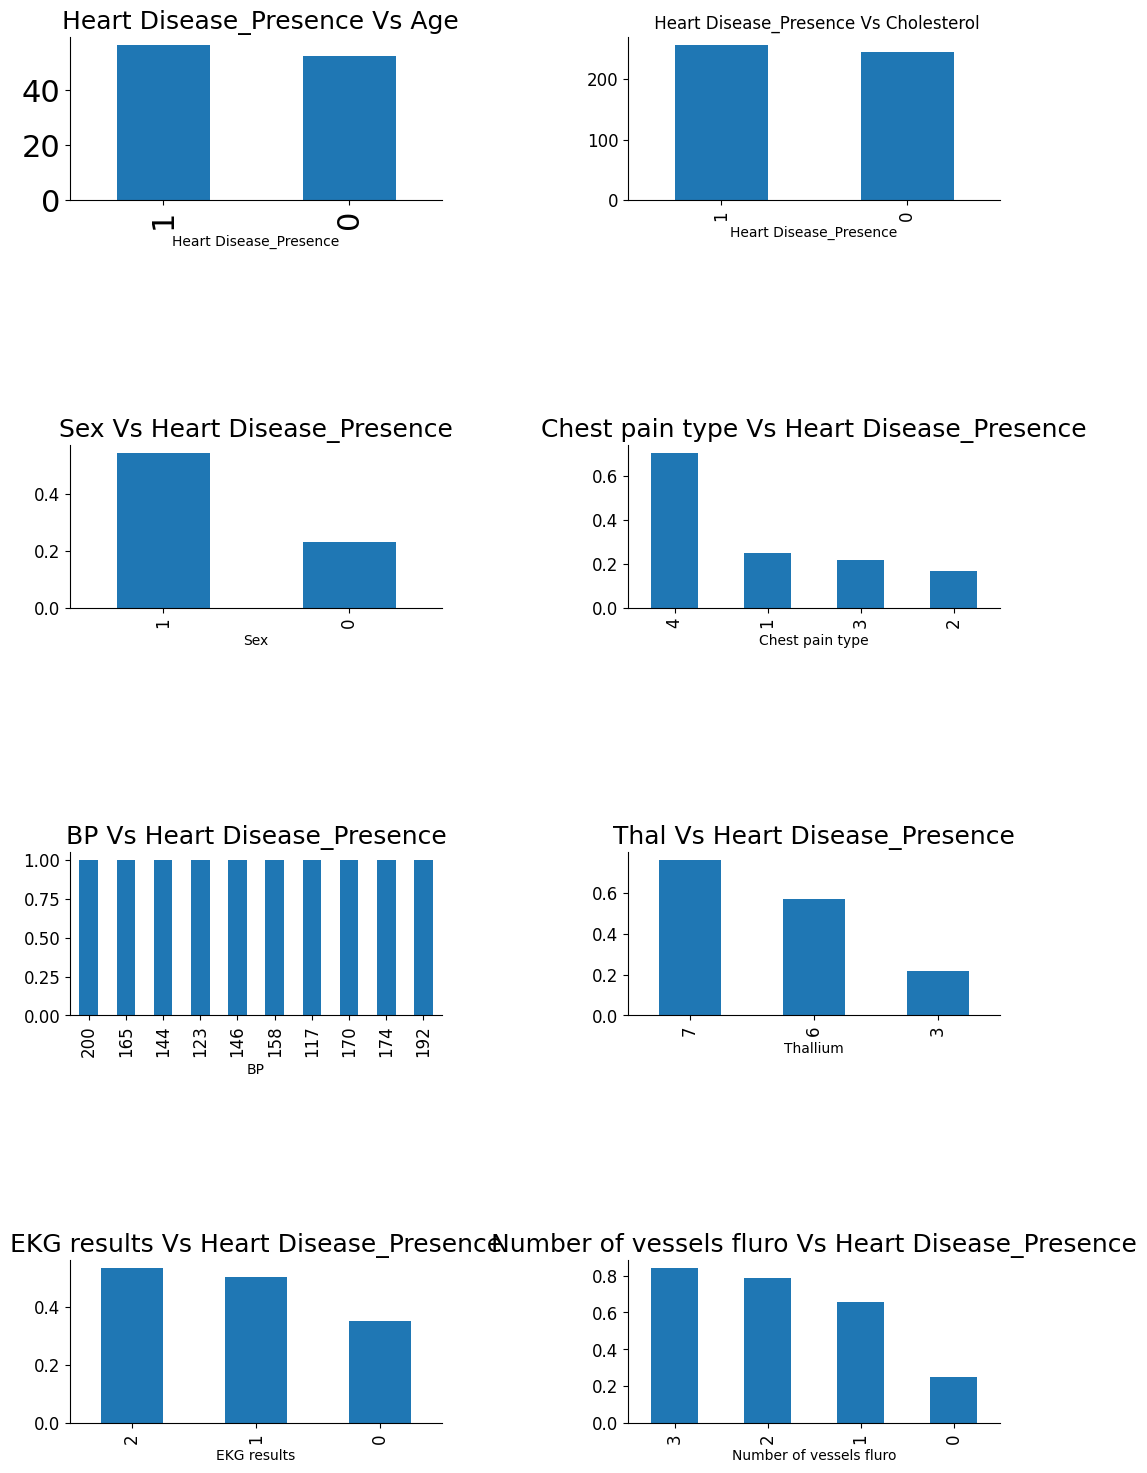

In [22]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('Heart Disease_Presence')['Age'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=22)
axarr[0][0].set_title(" Heart Disease_Presence Vs Age", fontsize=18)
df.groupby('Heart Disease_Presence')['Cholesterol'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title(" Heart Disease_Presence Vs Cholesterol", fontsize=12)
df.groupby('Sex')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Sex Vs Heart Disease_Presence", fontsize=18)
df.groupby('Chest pain type')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Chest pain type Vs Heart Disease_Presence", fontsize=18)
df.groupby('BP')['Heart Disease_Presence'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("BP Vs Heart Disease_Presence", fontsize=18)
df.groupby('Thallium')['Heart Disease_Presence'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Thal Vs Heart Disease_Presence", fontsize=18)
df.groupby('EKG results')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("EKG results Vs Heart Disease_Presence", fontsize=18)

df.groupby('Number of vessels fluro')['Heart Disease_Presence'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Number of vessels fluro Vs Heart Disease_Presence", fontsize=18)

plt.subplots_adjust(hspace=1.5)
plt.subplots_adjust(wspace=0.5)
sns.despine() #function that removes the spines from the right and upper portion of the plot by default

#**Preprocessing**

Preprocessing is a crucial step in preparing the data for machine learning or data analysis tasks. It involves various techniques to ensure that the data is in a suitable format for modeling.
In this dataset the target column is relatively balanced so there is no need to create dummy data. Also the unwanted column "heart Disease_Absence" was deleted above. There were no missing data in the analysis done above

In [23]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Presence'],
      dtype='object')

##**Seperate the dataframe into x and y**

In [24]:
#split data into X and y
X= df.drop("Heart Disease_Presence", axis = 1)
y= df["Heart Disease_Presence"]

In [25]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [26]:
y


0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease_Presence, Length: 270, dtype: uint8

In [27]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##**Feature Scaling**

In [28]:

from sklearn.preprocessing import StandardScaler
#  Instantiate the StandardScaler
scaler = StandardScaler()

In [29]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Machine learning Model**

##**Decision Tree**


In [30]:
from sklearn import tree

dt_model = DecisionTreeClassifier( max_depth = 5)

#  Train the model using the scaled training data
dt_model.fit(X_train_scaled, y_train)

#  Make predictions on the scaled test data
y_pred = dt_model.predict(X_test_scaled)

In [31]:

#hyperparameters selection
# Define the parameter grid with max depth values to search through
param_grid = {'max_depth': [None , 5, 10, 15, 20]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# Get the best max depth from the search results
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 15


In [32]:

# Evaluate the model's performance on the test data
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred,average="weighted")
print(f"Accuracy: {accuracy_dt:.2f} Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1 score:{f1_dt:.2f} ")


Accuracy: 0.73 Precision: 0.67, Recall: 0.67, F1 score:0.73 


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        48
           1       0.67      0.67      0.67        33

    accuracy                           0.73        81
   macro avg       0.72      0.72      0.72        81
weighted avg       0.73      0.73      0.73        81



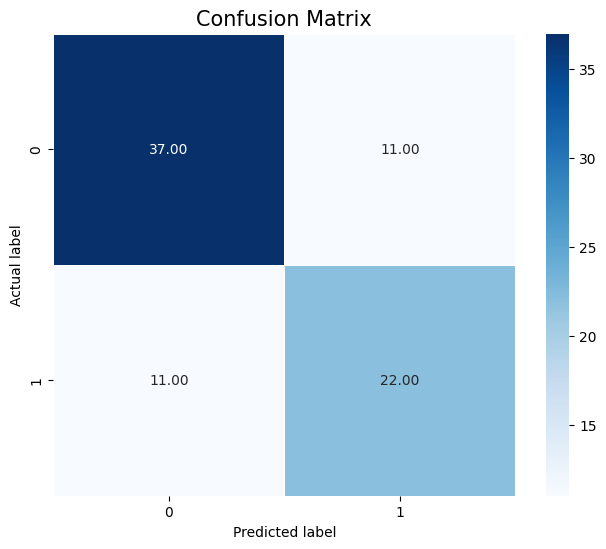

In [33]:

print(f'{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**Naive Bayes**

Accuracy: 0.85 Precision: 0.89, Recall: 0.73, F1 score:0.85 
 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.89      0.73      0.80        33

    accuracy                           0.85        81
   macro avg       0.86      0.83      0.84        81
weighted avg       0.86      0.85      0.85        81

 


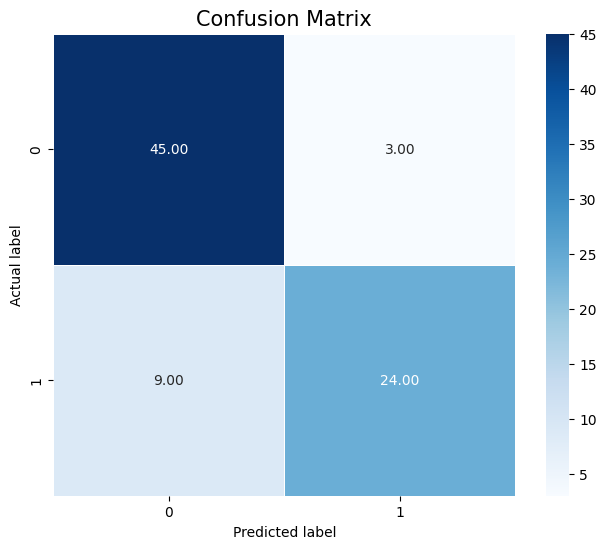

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred = nb_model.predict(X_test_scaled)


# Evaluate the model's performance on the test data
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb= recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred,average="weighted")



print(f"Accuracy: {accuracy_nb:.2f} Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}, F1 score:{f1_nb:.2f} ")

print(" ")
print(f'{classification_report(y_test, y_pred)}')
print(" ")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**Support Vector Machine (SVM)**

Accuracy: 0.86 Precision: 0.89, Recall: 0.76, F1 score:0.86 
 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.89      0.76      0.82        33

    accuracy                           0.86        81
   macro avg       0.87      0.85      0.86        81
weighted avg       0.87      0.86      0.86        81

 


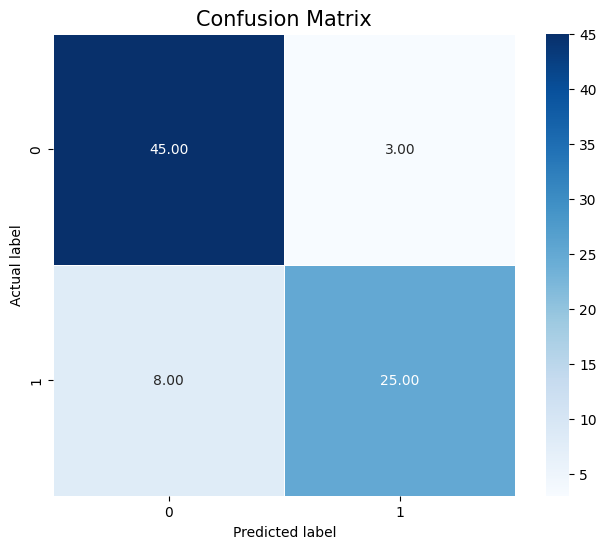

In [35]:
from sklearn.svm import SVC
sv_model = SVC(probability=True, kernel ='linear')
sv_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = sv_model.predict(X_test_scaled)




# Evaluate the model's performance on the test data
accuracy_sv = accuracy_score(y_test, y_pred)
precision_sv = precision_score(y_test, y_pred)
recall_sv = recall_score(y_test, y_pred)
f1_sv = f1_score(y_test, y_pred,average="weighted")



print(f"Accuracy: {accuracy_sv:.2f} Precision: {precision_sv:.2f}, Recall: {recall_sv:.2f}, F1 score:{f1_sv:.2f} ")

print(" ")
print(f'{classification_report(y_test, y_pred)}')
print(" ")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**Random Forest**

Accuracy: 0.840 Precision: 0.88, Recall: 0.70, F1 score:0.84 
 
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.88      0.70      0.78        33

    accuracy                           0.84        81
   macro avg       0.85      0.82      0.83        81
weighted avg       0.85      0.84      0.84        81

 


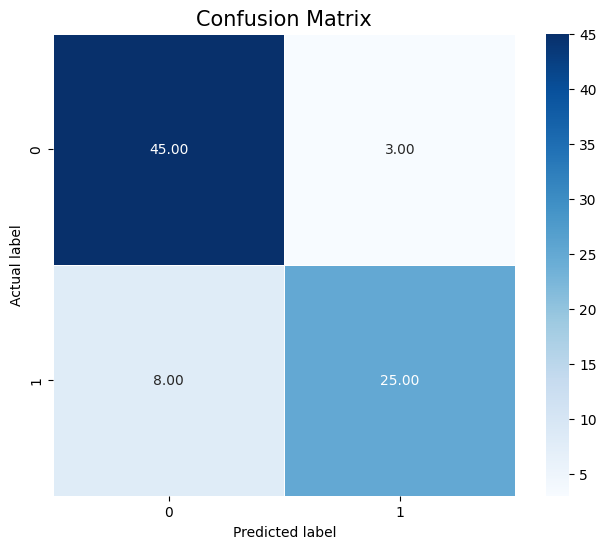

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = rf_model.predict(X_test_scaled)




# Evaluate the model's performance on the test data
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred,average="weighted")



print(f"Accuracy: {accuracy_rf:.3f} Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1 score:{f1_rf:.2f} ")

print(" ")
print(f'{classification_report(y_test, y_pred)}')
print(" ")

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**Logistic Regression**

Accuracy: 0.88 Precision: 0.93, Recall: 0.76, F1 score:0.87 
 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.93      0.76      0.83        33

    accuracy                           0.88        81
   macro avg       0.89      0.86      0.87        81
weighted avg       0.88      0.88      0.87        81

 


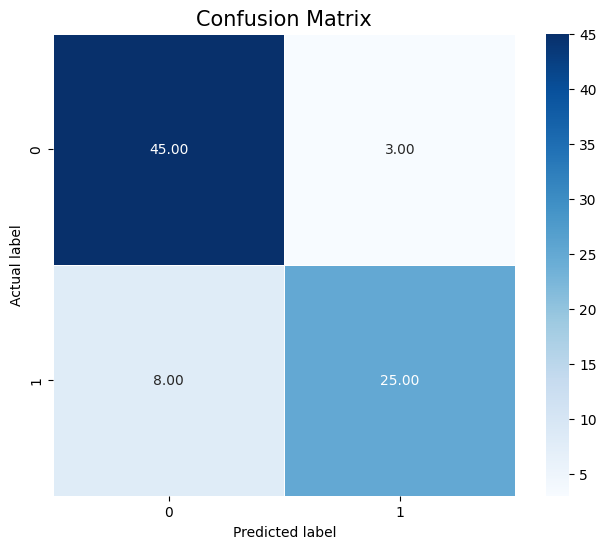

In [37]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = lr_model.predict(X_test_scaled)




# Evaluate the model's pelrormance on the test data
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred,average="weighted")



print(f"Accuracy: {accuracy_lr:.2f} Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}, F1 score:{f1_lr:.2f} ")

print(" ")
print(f'{classification_report(y_test, y_pred)}')
print(" ")

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

##**K-nearest neighbors (KNN)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier( n_neighbors =5, metric ='euclidean', weights='uniform')
kn_model.fit(X_train_scaled, y_train)
#  Make predictions on the scaled test data
y_pred = kn_model.predict(X_test_scaled)


In [39]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 15, 20],  # You can adjust these values
    'metric': ['euclidean', 'manhattan'],  # You can try different distance metrics
    'weights': ['uniform', 'distance']  # You can try different weight options
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(kn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-Validation Score: 0.846941678520626
Test Set Accuracy: 0.8641975308641975


Accuracy: 0.86 Precision: 0.92, Recall: 0.73, F1 score:0.86 
 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        48
           1       0.92      0.73      0.81        33

    accuracy                           0.86        81
   macro avg       0.88      0.84      0.85        81
weighted avg       0.87      0.86      0.86        81

 


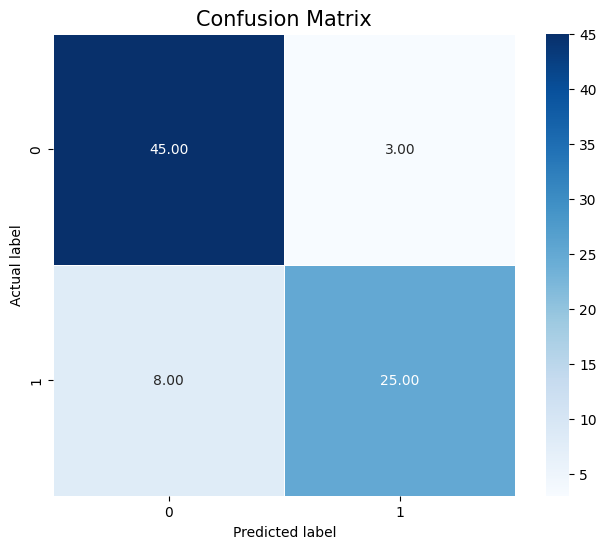

In [40]:
accuracy_kn = accuracy_score(y_test, y_pred)
precision_kn = precision_score(y_test, y_pred)
recall_kn = recall_score(y_test, y_pred)
f1_kn = f1_score(y_test, y_pred,average="weighted")



print(f"Accuracy: {accuracy_kn:.2f} Precision: {precision_kn:.2f}, Recall: {recall_kn:.2f}, F1 score:{f1_kn:.2f} ")

print(" ")
print(f'{classification_report(y_test, y_pred)}')
print(" ")

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

###**Compare Acurracy**

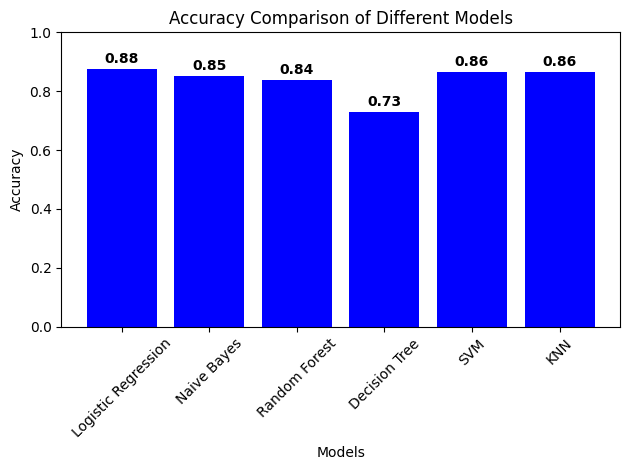

In [41]:
# compare model
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
accuracy_values = [accuracy_lr, accuracy_nb, accuracy_rf, accuracy_dt, accuracy_sv, accuracy_kn]

# Create a DataFrame
compare = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})

# Create a bar chart
plt.bar(compare['Model'], compare['Accuracy'], color='blue')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for i, accuracy in enumerate(compare['Accuracy']):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', color='black', fontweight='bold')

plt.show()






###**Compare Precision**

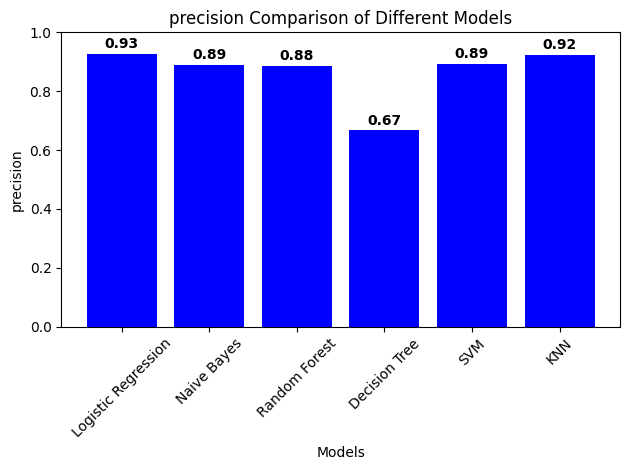

In [42]:
# compare model
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
precision_values = [precision_lr, precision_nb, precision_rf, precision_dt, precision_sv, precision_kn]

# Create a DataFrame
compare = pd.DataFrame({'Model': model_names, 'precision': precision_values})

# Create a bar chart
plt.bar(compare['Model'], compare['precision'], color='blue')

plt.xlabel('Models')
plt.ylabel('precision')
plt.title('precision Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for i, precision in enumerate(compare['precision']):
    plt.text(i, precision + 0.02, f'{precision:.2f}', ha='center', color='black', fontweight='bold')

plt.show()

###**Compare Recall**

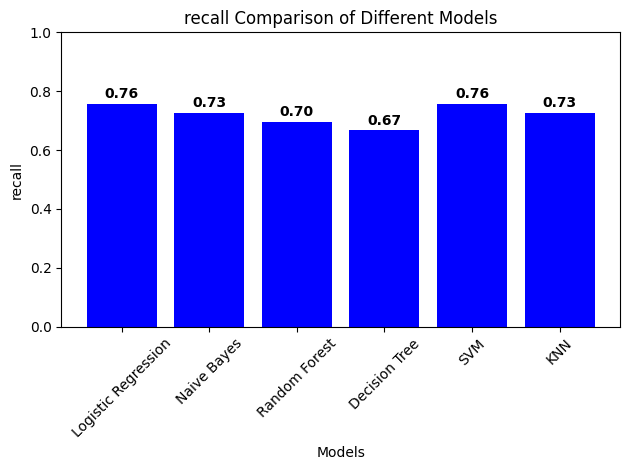

In [43]:
# compare model
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
recall_values = [recall_lr, recall_nb, recall_rf, recall_dt, recall_sv, recall_kn]

# Create a DataFrame
compare = pd.DataFrame({'Model': model_names, 'recall': recall_values})

# Create a bar chart
plt.bar(compare['Model'], compare['recall'], color='blue')

plt.xlabel('Models')
plt.ylabel('recall')
plt.title('recall Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for i, recall in enumerate(compare['recall']):
    plt.text(i, recall + 0.02, f'{recall:.2f}', ha='center', color='black', fontweight='bold')

plt.show()

###**Compare F1-score**

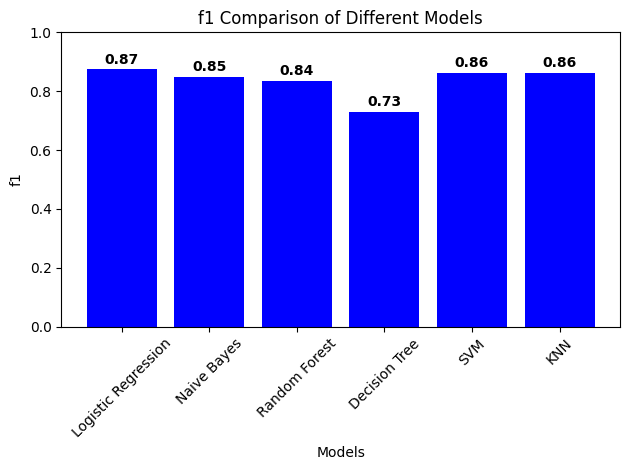

In [44]:
# compare model
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
f1_values = [f1_lr, f1_nb, f1_rf, f1_dt, f1_sv, f1_kn]

# Create a DataFrame
compare = pd.DataFrame({'Model': model_names, 'f1': f1_values})

# Create a bar chart
plt.bar(compare['Model'], compare['f1'], color='blue')

plt.xlabel('Models')
plt.ylabel('f1')
plt.title('f1 Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for i, f1 in enumerate(compare['f1']):
    plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center', color='black', fontweight='bold')

plt.show()

##**Evaluate the model**

In [45]:
# Get predicted probabilities
from sklearn.metrics import roc_curve, roc_auc_score
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
sv_probs = sv_model.predict_proba(X_test_scaled)[:, 1]
kn_probs = kn_model.predict_proba(X_test_scaled)[:, 1]

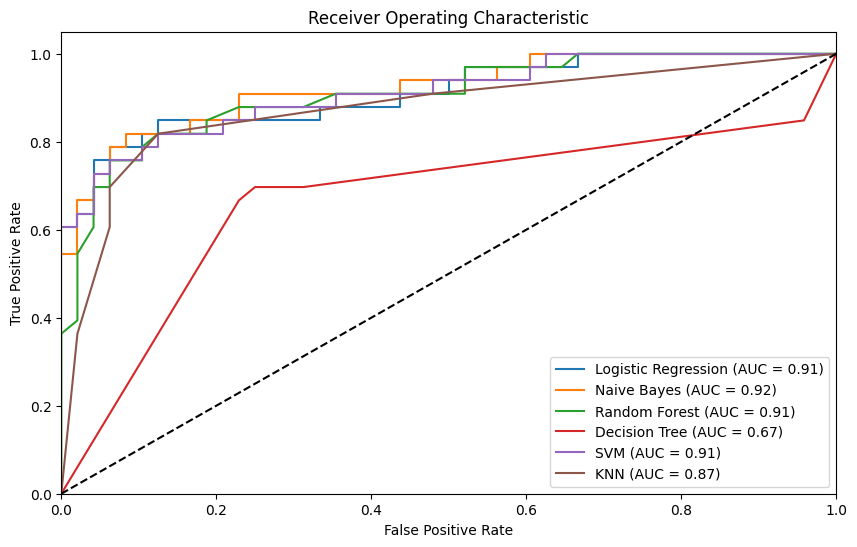

In [46]:
# Compute ROC curve and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
sv_auc = roc_auc_score(y_test, sv_probs)
kn_auc = roc_auc_score(y_test, kn_probs)

# Create ROC curve plots
plt.figure(figsize=(10, 6))

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(sv_fpr, sv_tpr, label=f'SVM (AUC = {sv_auc:.2f})')
plt.plot(kn_fpr, kn_tpr, label=f'KNN (AUC = {kn_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()




In [47]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [48]:
param_dist = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}


# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV( LogisticRegression(), param_distributions=param_dist, n_iter=15, cv=5, scoring='accuracy')

# Perform the randomized search on the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'solver': 'liblinear', 'C': 0.08858667904100823}
Best Cross-Validation Score: 0.846941678520626
Test Set Accuracy: 0.8765432098765432


In [49]:
#cross validation why is the cross validation accuracy lower
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(random_search, X, y,cv= 5, scoring ="accuracy")
cv_acc= cv_acc.mean()
cv_acc

0.8407407407407407

In [50]:
cv_precision = cross_val_score(random_search, X, y,cv= 5, scoring ="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8445906267645398

In [51]:

cv_recall = cross_val_score(random_search, X, y,cv= 5, scoring ="recall")
cv_recall= cv_recall.mean()
cv_recall

0.7833333333333332

In [52]:
cv_f1 = cross_val_score(random_search, X, y,cv= 5, scoring ="f1")
cv_f1= cv_f1.mean()
cv_f1

0.8290163428923837

<Axes: title={'center': 'Cross-validation metric for Logistic regression model'}>

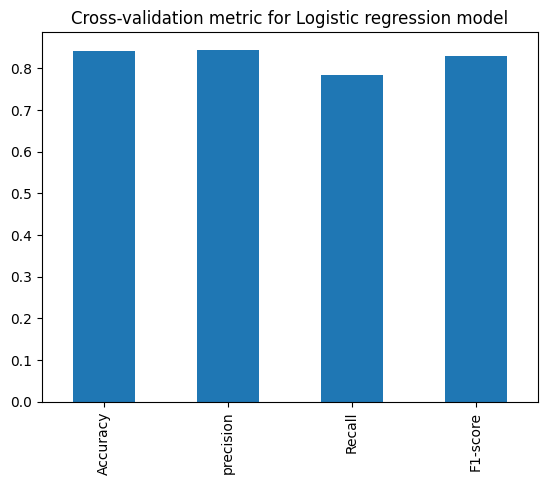

In [53]:
#visualize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "precision":cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title= "Cross-validation metric for Logistic regression model", legend= False)

In [54]:
param_dist = { "max_depth": [None, 3, 5, 10],  "min_samples_split": np.arange(2, 20, 2),  "min_samples_leaf": np.arange(1,20,2)}


# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV( RandomForestClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy')

# Perform the randomized search on the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'min_samples_split': 12, 'min_samples_leaf': 3, 'max_depth': 3}
Best Cross-Validation Score: 0.8625889046941678
Test Set Accuracy: 0.8395061728395061


In [55]:
#Evaluate the randomized search
random_search.score(X_test_scaled, y_test)

0.8395061728395061

In [56]:
cv_acc = cross_val_score(random_search, X, y,cv= 5, scoring ="accuracy")
cv_acc= cv_acc.mean()
cv_acc


0.8407407407407408

In [57]:
cv_precision = cross_val_score(random_search, X, y,cv= 5, scoring ="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8691774891774893

In [58]:

cv_recall = cross_val_score(random_search, X, y,cv= 5, scoring ="recall")
cv_recall= cv_recall.mean()
cv_recall

0.75

In [59]:
cv_f1 = cross_val_score(random_search, X, y,cv= 5, scoring ="f1")
cv_f1= cv_f1.mean()
cv_f1

0.8177162933684674

<Axes: title={'center': 'Cross-validation metric for Random Forest model'}>

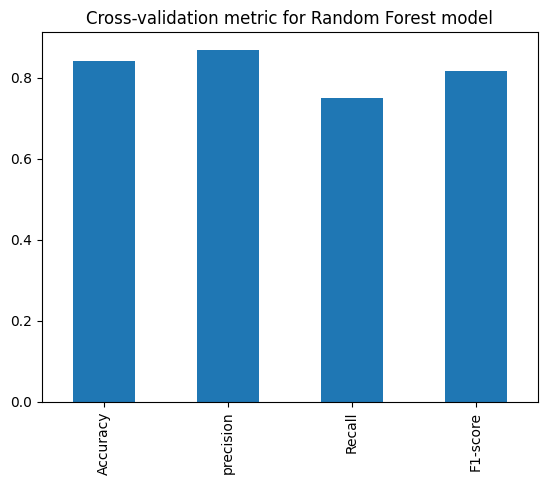

In [60]:
#visualize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "precision":cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title= "Cross-validation metric for Random Forest model", legend= False)

**Feature importance**

In [61]:
clf = LogisticRegression(C=0.012742749857031334, solver ='liblinear') # c is taken from the best params above
clf.fit(X_train_scaled, y_train)
clf.coef_

array([[ 0.04420764,  0.14529629,  0.22524404,  0.06957109,  0.05844289,
        -0.02008344,  0.08997701, -0.15541389,  0.19371227,  0.18036878,
         0.11965617,  0.28444214,  0.25975075]])

<Axes: title={'center': 'Feature importance'}>

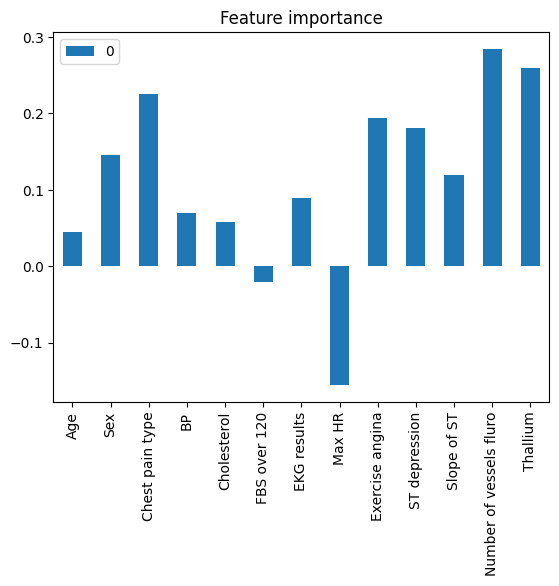

In [62]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature importance")


#**Conclusion**

In conclusion, our heart disease data science project has provided valuable insights. Through rigorous data analysis and machine learning techniques, we have successfully leveraged our data to better understand and predict the some of the risks associated with heart disease in our dataset.

Our project has highlighted the significance of various factors, such as chest pain type, thallium stress test, fluroscopy, st depression in ekg, exercise angina and chest pain type in determining the likelihood of heart disease. By identifying these risk factors, we can empower individuals and healthcare professionals to take proactive measures to reduce the risk of heart disease.

Furthermore, the predictive models developed in this project have demonstrated promising accuracy in forecasting the likelihood of heart disease in individuals. Logistic regression was shown to have higher results in accuracy, precision, f1 score and recall. Two models were choossen to improve, random forest and logistic regression
